In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"]. astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


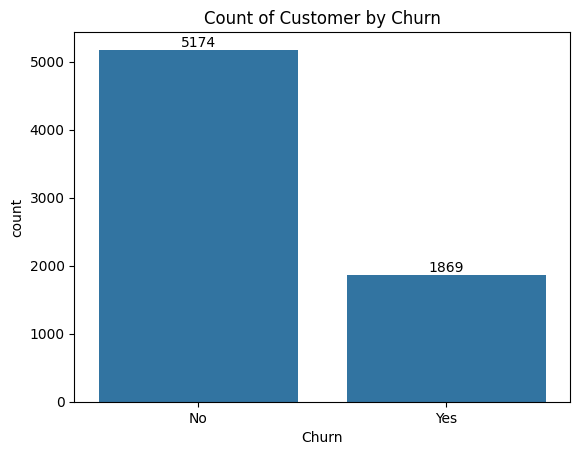

In [11]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

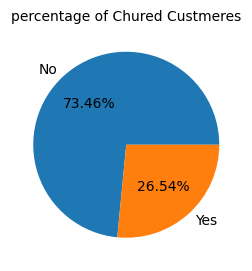

In [12]:
plt.figure(figsize = (3,4))
gb = df['Churn'].value_counts()
plt.pie(gb,labels = gb.index, autopct = "%1.2f%%")
plt.title("percentage of Chured Custmeres", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers out. #not let's explore the reason behind it

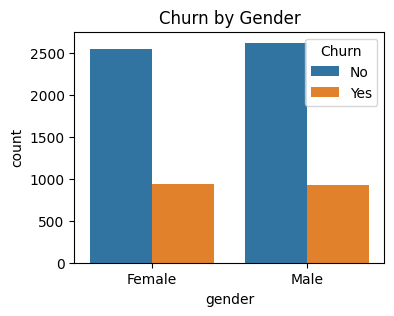

In [19]:
plt.figure(figsize = (4,3))
sns.countplot(x= "gender", data = df, hue =  "Churn")
plt.title("Churn by Gender".)
plt.show()

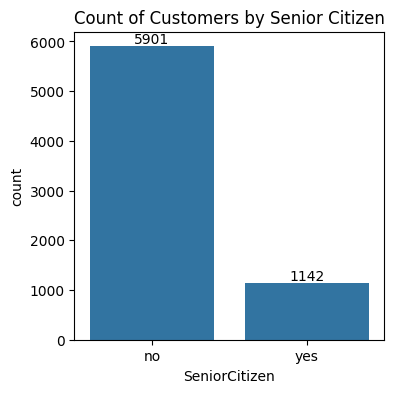

In [31]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

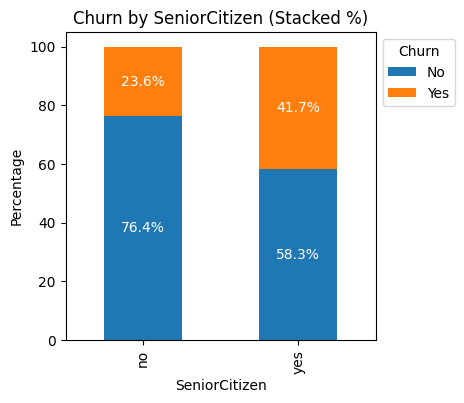

In [34]:
df_grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Define custom colors (based on your image)
custom_colors = ["#1f77b4", "#ff7f0e"]  # Dark Blue & Dark Orange

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
df_percent.plot(kind="bar", stacked=True, color=custom_colors, ax=ax)

# Annotate bars with percentages
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='white', fontsize=10)

plt.title("Churn by SeniorCitizen (Stacked %)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn", bbox_to_anchor = (1.0,1.0))
plt.show()

#comparative a greater pecentage of people in senior citizen category have churned

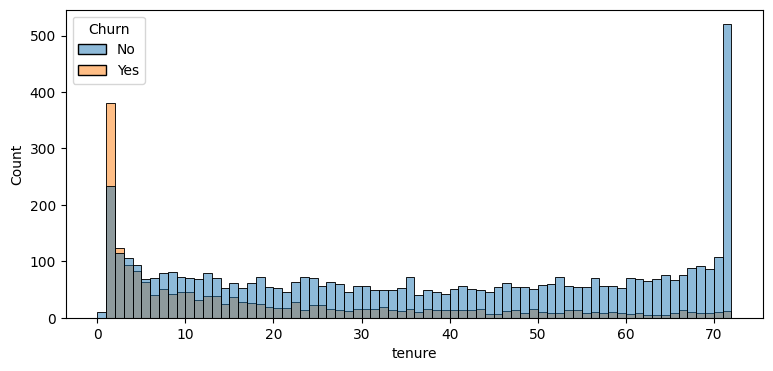

In [40]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data=df, bins = 72, hue = "Churn")
plt.show()

#people who have used our service for a long time have stayed and people who have used our sevices 
#1 or 2 months have churned

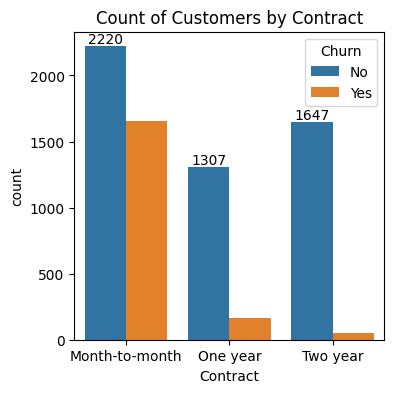

In [43]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are o=likely to churn then from those who have 1 to 2 years or contract.

In [44]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

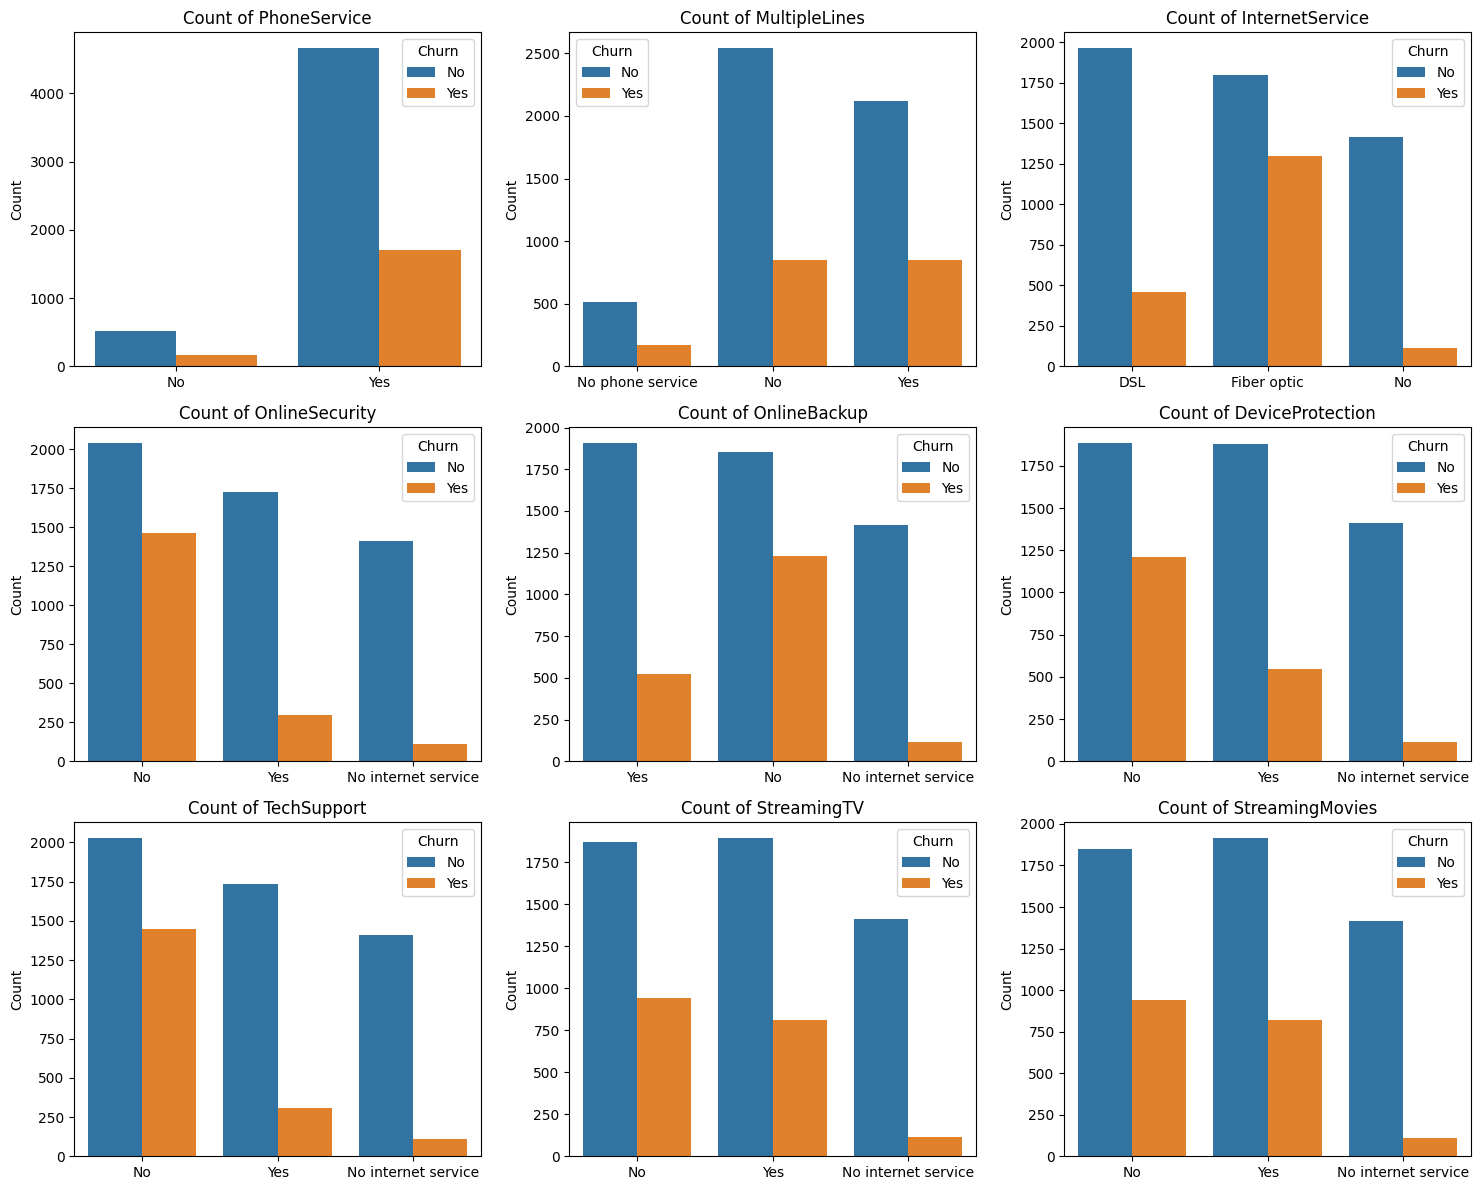

In [53]:
# Define the columns for subplots
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid
axes = axes.flatten()  # Flatten for easy iteration

# Define the complete color palette
custom_palette = {
    "Yes": "#ff7f0e", 
    "No": "#1f77b4", 
    "No internet service": "#81B29A", 
    "No phone service": "#F2CC8F",
    "DSL": "#F0A500",  # Added missing color for DSL
    "Fiber optic": "#0077B6"  # Added missing color for Fiber optic
}

# Plot countplots
for i, col in enumerate(columns):
    # Get unique values in the current column
    unique_vals = df[col].unique()
    
    # Ensure that custom_palette includes all unique values
    for val in unique_vals:
        if val not in custom_palette:
            custom_palette[val] = "#808080"  # Default color for missing values

    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"], palette=custom_palette)
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

    # No need to add legend if hue is the same as the column
    # Remove this line to prevent warnings
    # axes[i].legend(title=col, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


#The majority of customers who do not churn tend to have service like PhomeService, InternetService (particularly DSL), and OnlineSecurity enabled, for services like OnlineBackup, TechSupport, and StreamingTV, churm rates are noticeably higher when these services are not used or are unavailable.

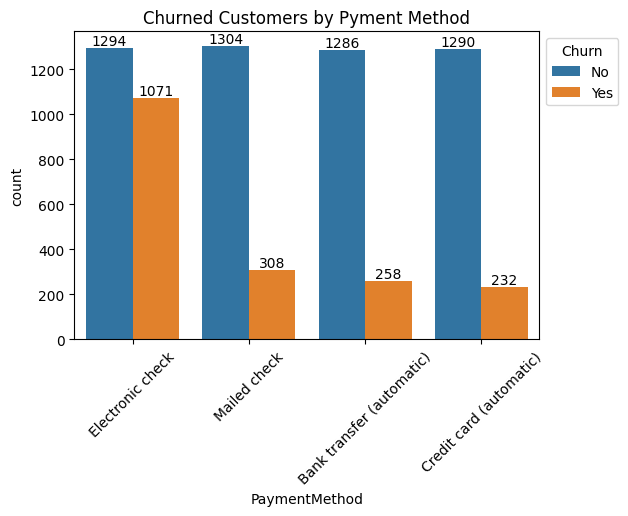

In [62]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x= "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Pyment Method")
plt.xticks(rotation = 45)
plt.legend(title="Churn", bbox_to_anchor = (1.0,1.0))
plt.show()

#customer is likely to churn when he is using electronic check as a payment method